In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-future-prediction/Employee.csv


# Employee Future Prediction - EDA, Classification Model, Analyse of feature importance.

Goal : 
Company's HR department wants to predict whether some customers would leave the company in next 2 years. <br>
Your job is to build a predictive model that predicts the prospects of future and present employee. <br>
Perform EDA and bring out insights<br>

About Data:  <br>
Dummy Data Used For A Private Hackathon<br>
Columns : <br>
Education - Education Level<br>
Joining Year - Year of Joining Company<br>
City - City office where posted<br>
Payment Tier - <br>
    1 : Highest<br>
    2 : Mid Level<br>
    3 : Lowest<br>
Age - Current Age<br>
Gender - Gender of Employee (Male, Female)<br>
EverBenched - Ever kept out of projects for 1 month or more. (True, False)<br>
ExperienceInCurrentDomain - Experience in currend Field (years)<br>
LeaveOrNot - Whether employee leaves the company in next 2 years. (0, 1)<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import cross_val_score

In [3]:
# Function to print data scores of model
def print_scores (model):
    if str(type(model)) == "<class 'sklearn.model_selection._search.GridSearchCV'>":
        roc = cross_val_score(model.best_estimator_, X_train, y_train, cv=7, scoring ='roc_auc')
        recall = cross_val_score(model.best_estimator_, X_train, y_train, cv=7, scoring ='recall')
        print (model.estimator)
    else:
        print(model)
        roc = cross_val_score(model, X_train, y_train, cv=7, scoring ='roc_auc')
        recall = cross_val_score(model, X_train, y_train, cv=7, scoring ='recall') 
    print ("Scores on training data:")
    print ("ROC AUC : {}".format(roc.mean()))
    print ("Recall : {}".format(recall.mean()))
# Function to print test scores of model
from sklearn import metrics
def print_final_scores (model):
    if str(type(model)) == "<class 'sklearn.model_selection._search.GridSearchCV'>":
        final_predictions = model.best_estimator_.predict(X_test)
        print (model.estimator)
    else: 
        final_predictions = model.predict(X_test)
    roc = metrics.roc_auc_score(final_predictions, y_test)
    recall = metrics.recall_score(final_predictions, y_test)
    print ("Scores on test data:")
    print ("ROC AUC : {}".format(roc))
    print ("Recall : {}".format(recall))

# EDA

In [4]:
data = pd.read_csv('../input/employee-future-prediction/Employee.csv')

In [5]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


<AxesSubplot:xlabel='Education', ylabel='count'>

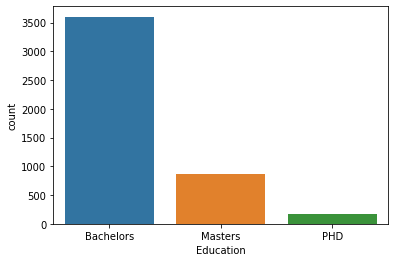

In [7]:
sns.countplot(data = data, x = 'Education')

<AxesSubplot:xlabel='City', ylabel='count'>

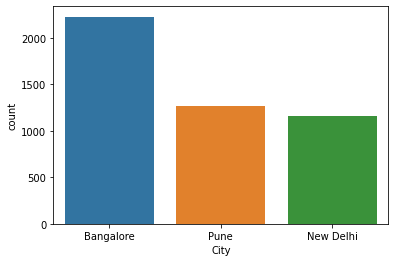

In [8]:
sns.countplot(data = data, x = 'City')

In [9]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


array([[<AxesSubplot:title={'center':'JoiningYear'}>,
        <AxesSubplot:title={'center':'PaymentTier'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'ExperienceInCurrentDomain'}>],
       [<AxesSubplot:title={'center':'LeaveOrNot'}>, <AxesSubplot:>]],
      dtype=object)

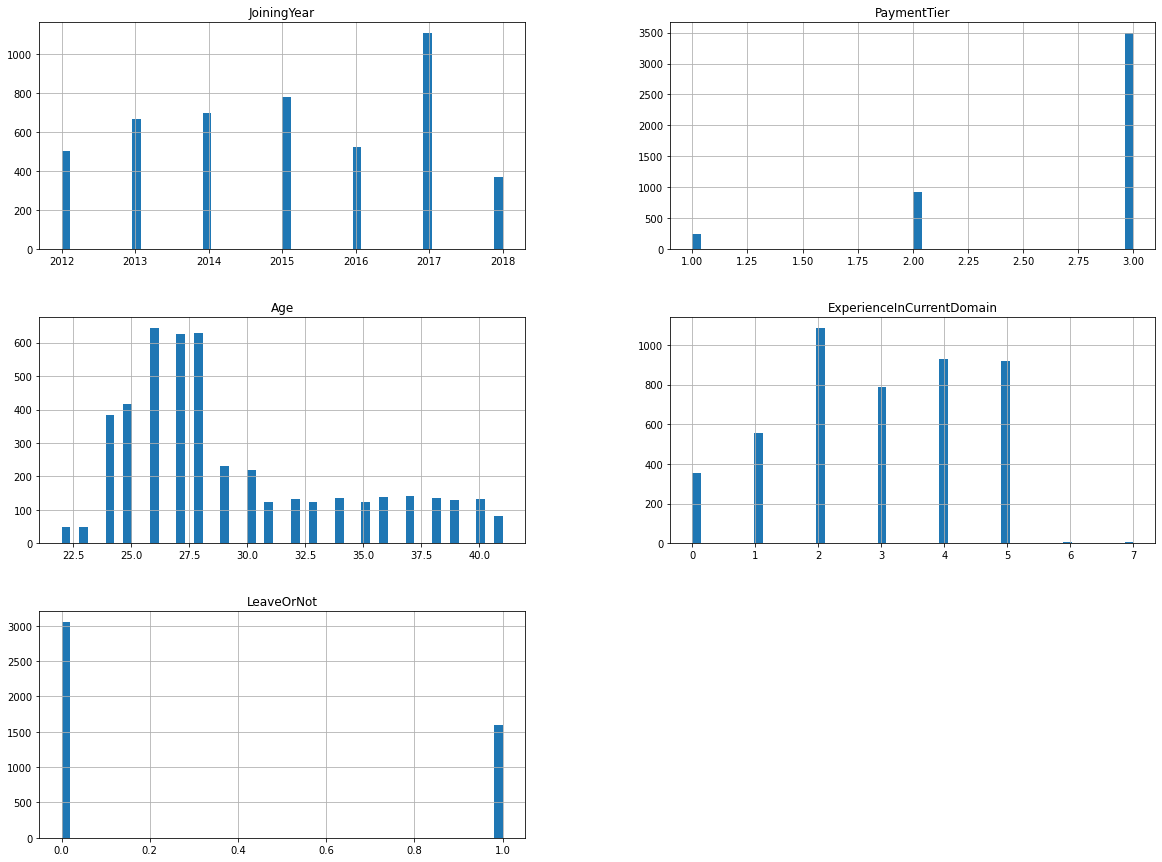

In [10]:
data.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

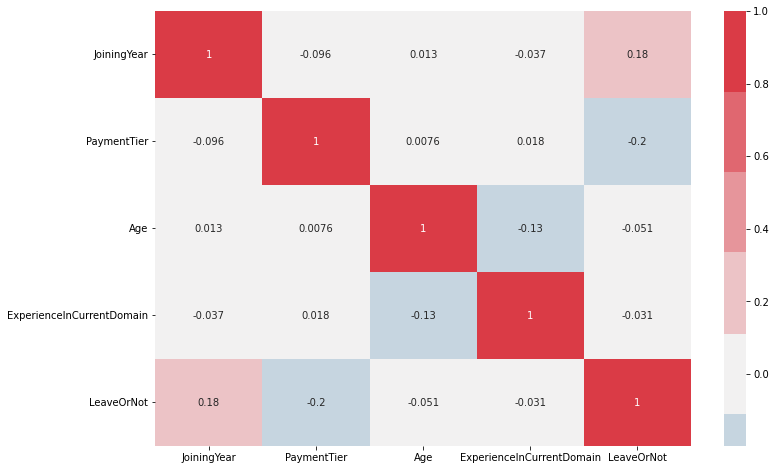

In [11]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data.corr(), cmap=sns.diverging_palette(240, 10, n=9), annot = True, ax = ax, center = 0)

# Feature Engineering

Encoding categorical data.

In [12]:
data['Gender'] = data['Gender'].replace('Female', 0)
data['Gender'] = data['Gender'].replace('Male', 1)

In [13]:
data['EverBenched'] = data['EverBenched'].replace('Yes', 1)
data['EverBenched'] = data['EverBenched'].replace('No', 0)

In [14]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
data_city_1hot = pd.get_dummies(data['City'])

In [15]:
data = data.drop('City',axis = 1)

In [16]:
data = pd.concat([data, data_city_1hot], axis = 1)

In [17]:
data.head()

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bangalore,New Delhi,Pune
0,Bachelors,2017,3,34,1,0,0,0,1,0,0
1,Bachelors,2013,1,28,0,0,3,1,0,0,1
2,Bachelors,2014,3,38,0,0,2,0,0,1,0
3,Masters,2016,3,27,1,0,5,1,1,0,0
4,Masters,2017,3,24,1,1,2,1,0,0,1


In [18]:
ordinal_cols_mapping =[
    { 
 'col':'Education',
            'mapping':{ 
                'Bachelors' : 1,
                'Masters' : 2,
                'PHD' : 3},
    }
]
encoder = OrdinalEncoder(mapping = ordinal_cols_mapping)
data = encoder.fit_transform(data)

In [19]:
# Separating target column and create train and test sets.
col_names = ['Education', 'JoiningYear', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'Bangalore',
       'New Delhi', 'Pune']
X = data[col_names]
y = data['LeaveOrNot']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, max_depth = 5, max_leaf_nodes = 8)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8, random_state=42)

In [21]:
print_scores(dt)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8, random_state=42)
Scores on training data:
ROC AUC : 0.7926457605658996
Recall : 0.4128819157720892


In [22]:
print_final_scores(dt)

Scores on test data:
ROC AUC : 0.8839430894308943
Recall : 0.9833333333333333


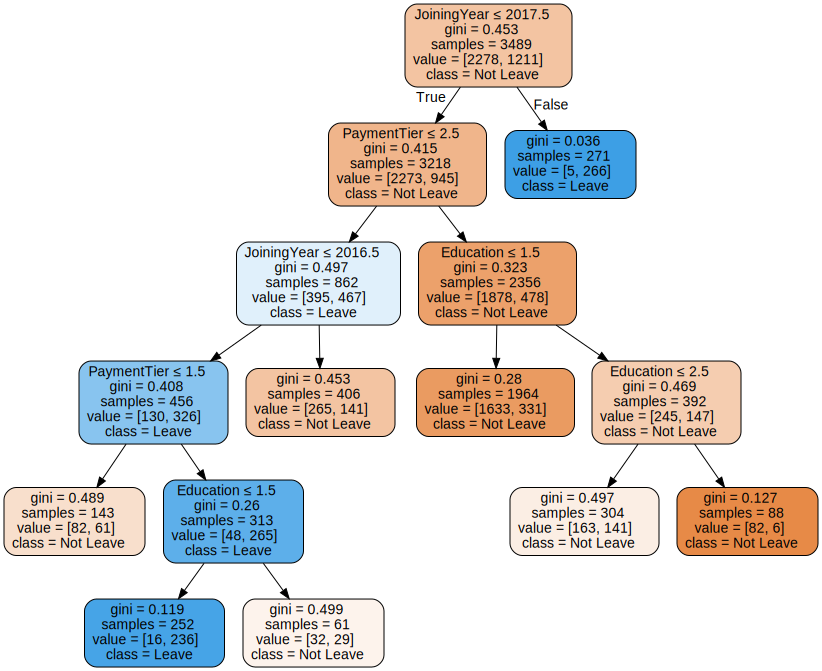

In [23]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dt, out_file = None, feature_names = X_train.columns, class_names =('Not Leave', 'Leave'), filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph

# Summary

After trying various models (KNNneighbours, RandomForest, XGBoost) I decided to use simple Decision Tree model for it's interpretibility while it still get high accuracy scores (only few percent lower than XGBoost). From visualisation of the model we can see that only 3 features are important which are Joining Year (recently  hired workers tend to leave), Payment'Tier (Higher PaymentTier tend to leave) and Education (Lower Educated Workers tend to leave). That simple decision tree can be used as an algorithm wchich can help HR easily (and accurately) classify workers.